In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# My modules
from utils import *

# Notebook Settings
sns.set_style('whitegrid')
pd.set_option('display.max_rows', None)

warnings.filterwarnings("ignore") 

In [2]:
data = pd.read_parquet('data/n_forecast_preprocessed.parquet', engine='pyarrow', dtype_backend='numpy_nullable')

In [3]:
data.set_index('sales_date', inplace=True)
data.sort_index(inplace=True)
# convert to float the n_transactions column
data['n_transactions'] = data['n_transactions'].astype(float)

In [4]:
data['store_hashed'].nunique()

595

# Forecasting for all stores

1. First of all we need to make all stores data stationary to be able to use ARIMA model. We will use differencing to make data stationary.
2. Then we will use auto_arima function to find the best parameters for ARIMA model.
3. Finally we will use ARIMA model to forecast number of transactions for each store.



# Check stationarity for each store

In [5]:
stationary_stores, non_stationary_stores = test_stores_stationarity(data, plot=False, results=False)

Stationary stores: 407
Non stationary stores: 188


In [6]:
# stationary_stores will have d=0 for arima model
# stationary_stores_1 will have d=1 for arima model
# stationary_store_2 will have d=2 for arima model
stationary_stores_1, non_stationary_stores_1 = differencing(data, non_stationary_stores)

Stationary stores: 188
Non stationary stores: 0


In [7]:
# Check all stores stationarity after differencing
data = data.dropna()

stationary_stores_2, non_stationary_stores_2 = test_stores_stationarity(data, plot=False, results=False)

Stationary stores: 595
Non stationary stores: 0


# Hyperparameters tuning for each store

In [8]:
# Load again the dataset
data = pd.read_parquet('data/n_forecast_preprocessed.parquet', engine='pyarrow', dtype_backend='numpy_nullable')
data.set_index('sales_date', inplace=True)
data.sort_index(inplace=True)
# convert to float the n_transactions column
data['n_transactions'] = data['n_transactions'].astype(float)

In [9]:
# stationary_stores   (d=0)
# stationary_stores_1 (d=1)

In [10]:
# Create empty dataframe with pdq values
# store_params = pd.DataFrame(columns=['store', 'pdq'])

In [11]:
# # # Find the best hyperparameters for ARIMA model
# for store in stationary_stores:
#     print(f"Store: {store}")
                      
#     data_store = data[data['store_hashed'] == store]
    
#     best_params = arima_hyperparameters(data_store['n_transactions'], diff=0)
#     print(best_params)
#     store_params = pd.concat([store_params, pd.DataFrame({'store': [store], 'pdq': [best_params]})], ignore_index=True)
    
#     # save the dataframe as csv file
#     # store_params.to_csv('data/stores_arima_params.csv', index=False)


In [12]:
# for store in stationary_stores_1:
#     print(f"Store: {store}")

#     data_store = data[data['store_hashed'] == store]

#     best_params = arima_hyperparameters(data_store['n_transactions'], diff=1)
#     print(best_params)
#     store_params = pd.concat([store_params, pd.DataFrame({'store': [store], 'pdq': [best_params]})], ignore_index=True)

#     # save the dataframe as csv file

# store_params.to_csv('data/stores_arima_params.csv', index=False)
    

In [13]:
# # Find the best hyperparameters for ARIMA model
for store in stationary_stores[:1]:
    data_store = data[data['store_hashed'] == store]

    tuned_arima(data_store['n_transactions'], diff=0, store=store)


Best ARIMA parameters: (8, 0, 7) with AIC: 19118.62876072526


In [14]:
# data_store.sort_index(inplace=True)

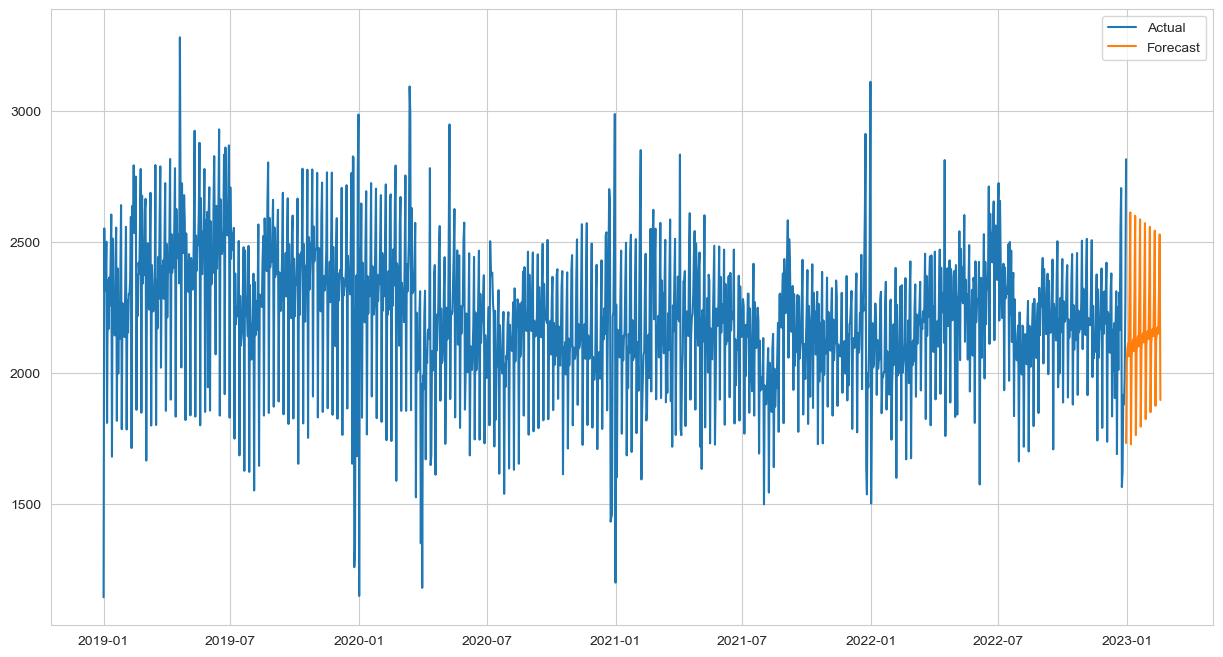

In [16]:
## Make this a function to use it for all stores.
# load the csv file 
store_forecast = pd.read_csv('forecast/arima_forecast_a58149d355f02887dfbe55ebb2b64ba3.csv')
# store_forecast.set_index('', inplace=True)
store_forecast.columns = ['sales_date', 'n_transactions']
store_forecast['sales_date'] = pd.to_datetime(store_forecast['sales_date'])
store_forecast.set_index('sales_date', inplace=True)
store_forecast.sort_index(inplace=True)

# plot the store forecast
data_store = data[data['store_hashed'] == stationary_stores[0]]

# convert to datetime the index
# reset the index
data_store.index = pd.to_datetime(data_store.index)

# sort the index
data_store.sort_index(inplace=True)

plt.figure(figsize=(15, 8))
plt.plot(data_store['n_transactions'], label='Actual')
plt.plot(store_forecast['n_transactions'], label='Forecast')
plt.legend()
plt.show()
